# Image generation: usage for variations

**Author:** [Guido Marinelli](https://github.com/GuidoMarinelli/)<br>
**Date created:** 2023/05/06<br>
**Last modified:** 2023/05/07<br>
**Description:** Generate or manipulate images with a DALL·E model.<br>

## Setup

In [1]:
import openai
import urllib
import matplotlib.pyplot as plt

from io import BytesIO
from PIL import Image

from keys import OPENAI_API_KEY  # indirect import of the API key

openai.api_key = OPENAI_API_KEY

In [2]:
def resize_image(image_from_disk):
    """
    Read the image file from disk and resize it.
    """
    image = Image.open(image_from_disk)
    width, height = 256, 256
    image = image.resize((width, height))
    return image


def convert_in_BytesIO_object(image):
    """
    Convert the image to a BytesIO object.
    """
    byte_stream = BytesIO()
    image.save(byte_stream, format='PNG')
    byte_array = byte_stream.getvalue()
    return byte_array


def get_variations(byte_array):
    """
    Generates a variation of a given image.
    """
    try:
        byte_array = convert_in_BytesIO_object(resize_image(image))
        response = openai.Image.create_variation(
            image=byte_array,
            n=1,
            size='1024x1024'
        )
        return response['data'][0]['url']
    except openai.error.OpenAIError as error:
        print(error.http_status)
        print(error.error)


def show_images(image, image_url):
    """
    Show the original image and the varied one next to each other.
    """
    plt.figure(figsize=(25,30))
    
    plt.subplot(1, 2, 1)  # original image
    img_input = plt.imread(image)
    plt.imshow(img_input)
    plt.title('INPUT', fontsize=30)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)  # varied image
    response = urllib.request.urlretrieve(image_url, 'variations.jpg')
    image = plt.imread(response[0])
    plt.imshow(image)
    plt.title('OUTPUT', fontsize=30)
    plt.axis('off')
    
    plt.tight_layout()
    

## Variations

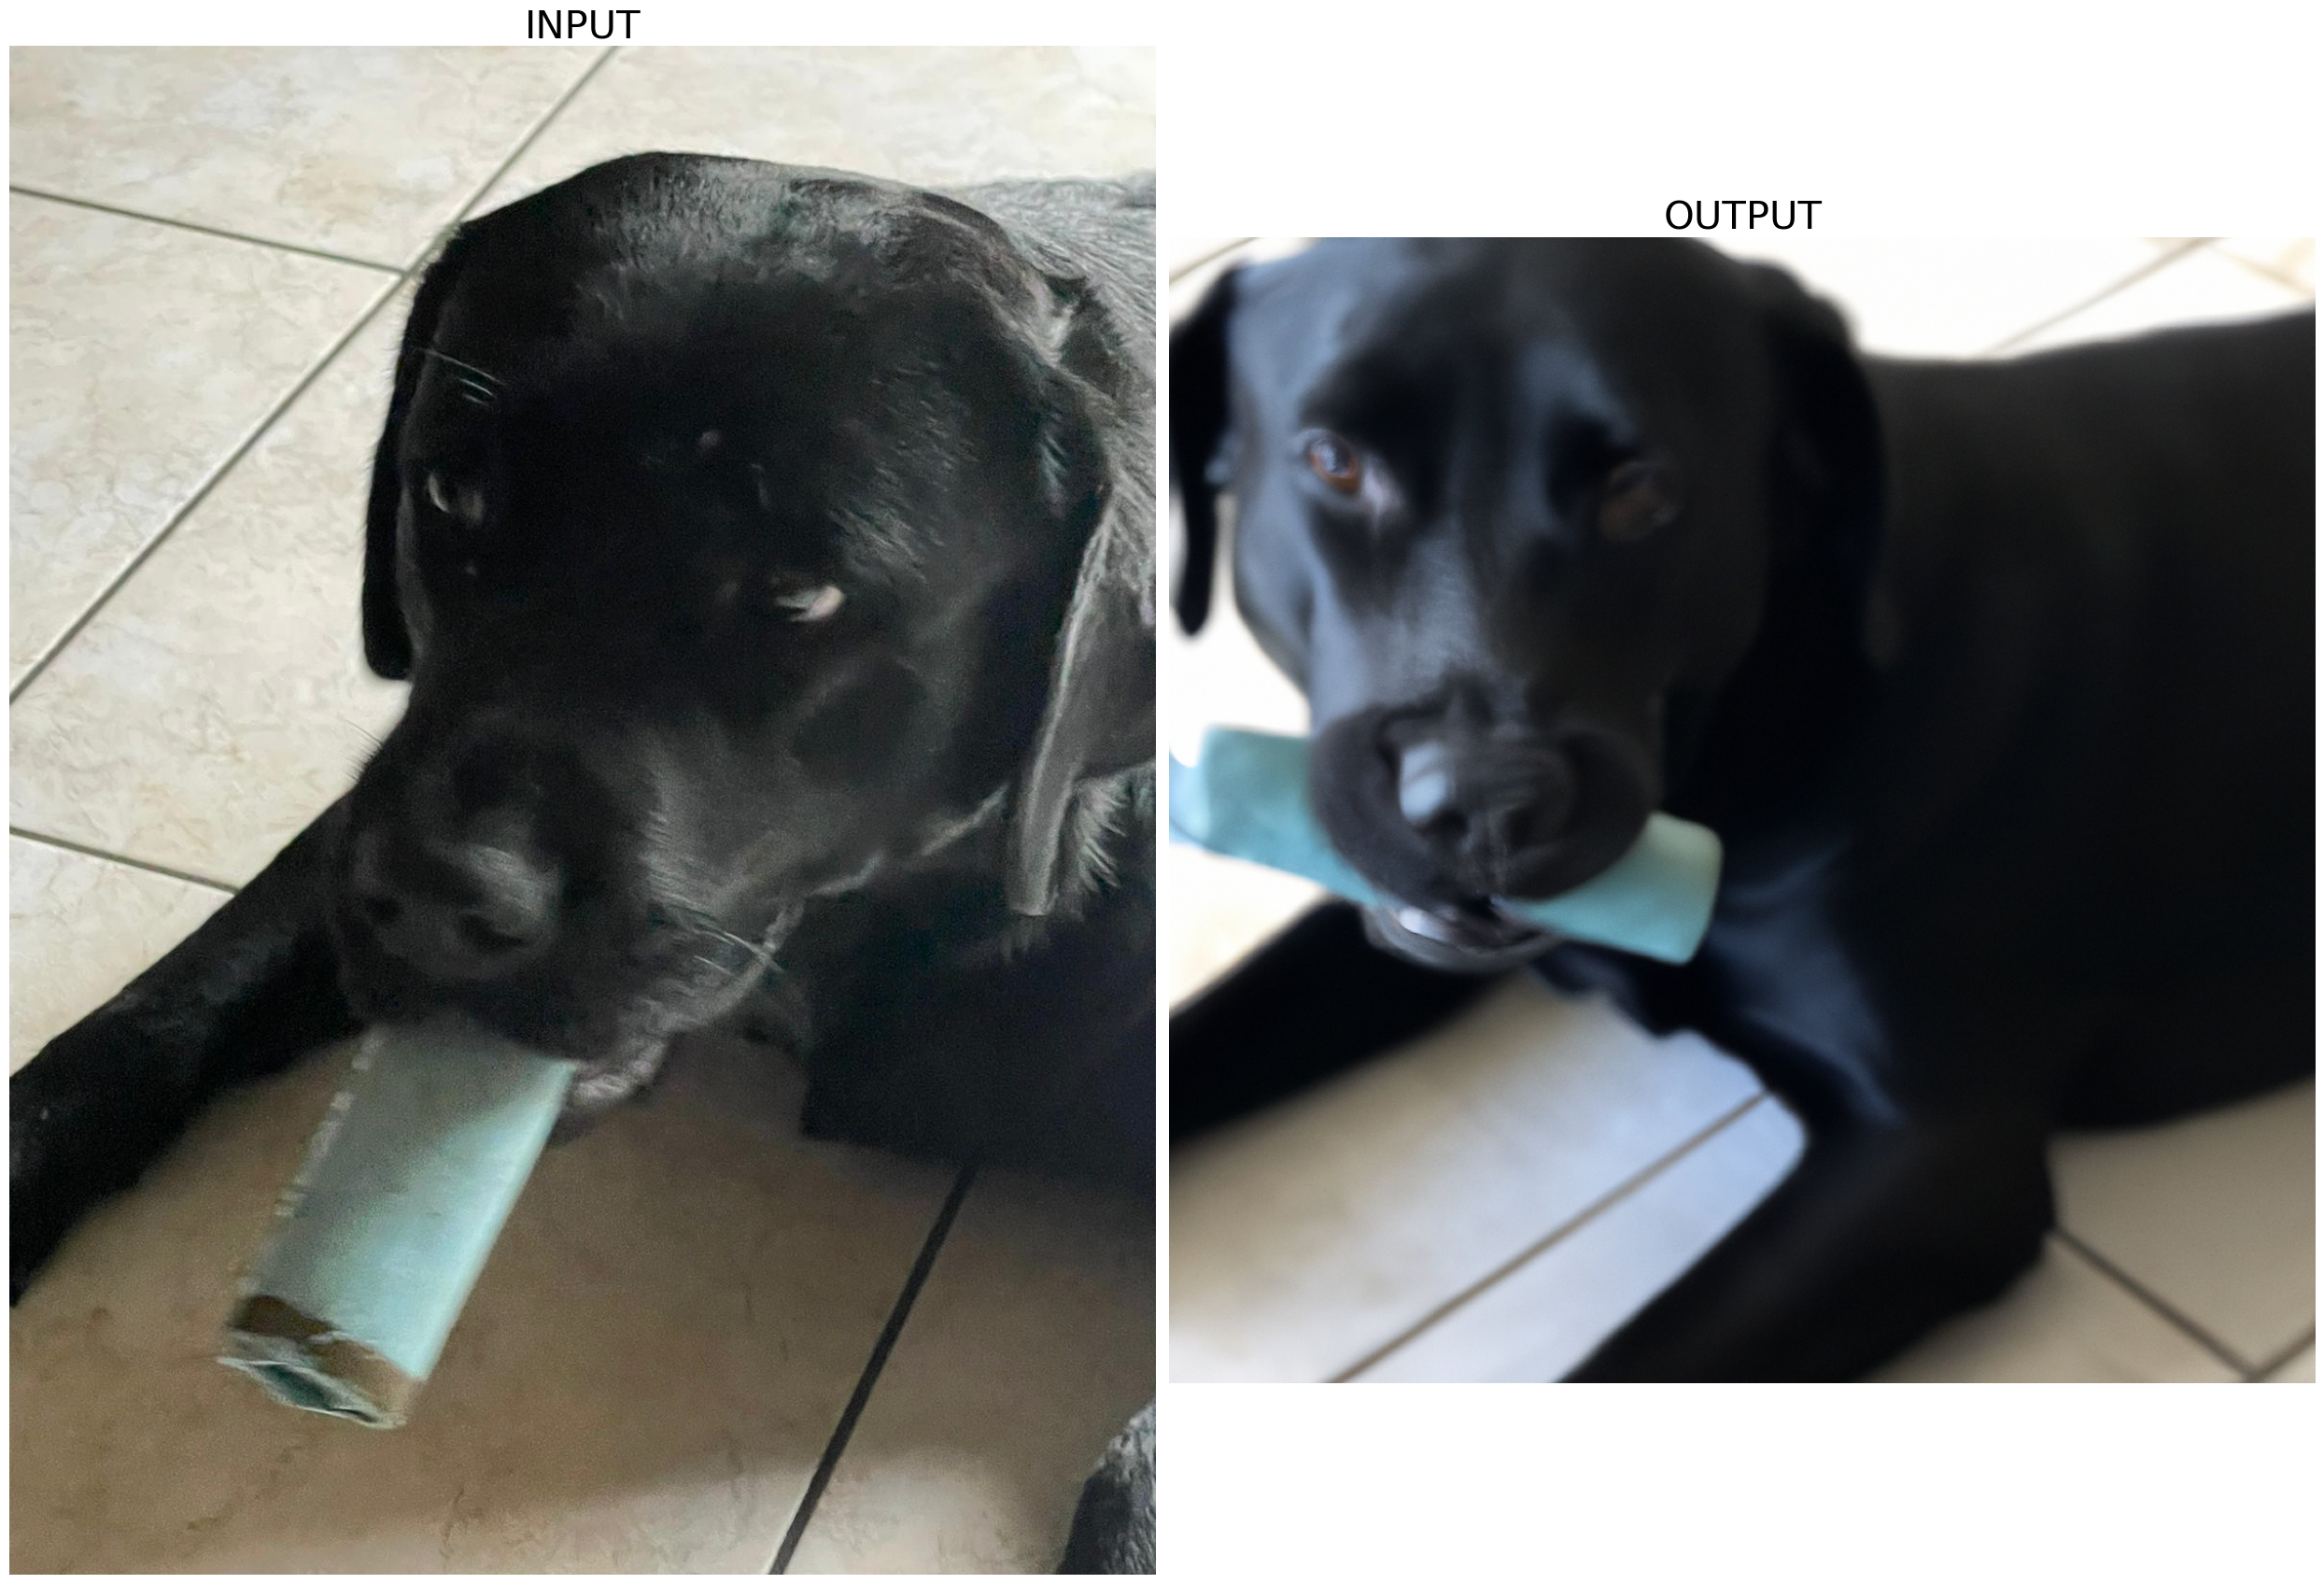

In [3]:
image = 'dog_with_pimpa.png'

image_url = get_variations(image)
show_images(image, image_url)